In [25]:
import pandas as pd
import numpy as np

df = pd.read_csv('/home/yj/kuuniv.bigdata2025/orange3/healthcare-dataset-stroke-data.csv')
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1


In [26]:
df. shape

(5110, 12)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [28]:
df['id'].isnull().sum()

0

In [29]:
n =len(pd.unique(df['id']))
print(n)

5110


In [30]:
df['stroke'].value_counts(dropna=False)

stroke
0    4861
1     249
Name: count, dtype: int64

In [31]:
df['stroke'].value_counts(dropna=False, normalize=True)

stroke
0   0.95
1   0.05
Name: proportion, dtype: float64

In [32]:
cols =['age', 'avg_glucose_level', 'bmi']
df[cols].describe()

,age,avg_glucose_level,bmi
count,5110.00,5110.00,4909.00
mean,43.23,106.15,28.89
std,22.61,45.28,7.85
min,0.08,55.12,10.30
25%,25.00,77.25,23.50
50%,45.00,91.88,28.10
75%,61.00,114.09,33.10
max,82.00,271.74,97.60


In [33]:
pd.options.display.float_format = '{:.2f}'.format
df[cols].describe()


,age,avg_glucose_level,bmi
count,5110.00,5110.00,4909.00
mean,43.23,106.15,28.89
std,22.61,45.28,7.85
min,0.08,55.12,10.30
25%,25.00,77.25,23.50
50%,45.00,91.88,28.10
75%,61.00,114.09,33.10
max,82.00,271.74,97.60


In [34]:
c = df['age'] > 18
df[c].head(3)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1


In [35]:
len(df[c])

4194

In [36]:
df1 = df[c]

In [37]:
df1 = df1.rename(columns={'Residence': 'residence_type'})

In [38]:
cols1 = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df1[cols1].isnull().sum()

gender            0
hypertension      0
heart_disease     0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

In [39]:
df1[cols1].dtypes

gender            object
hypertension       int64
heart_disease      int64
ever_married      object
work_type         object
Residence_type    object
smoking_status    object
dtype: object

In [40]:
cols = ['age', 'avg_glucose_level', 'bmi']
df1[cols].describe()

,age,avg_glucose_level,bmi
count,4194.00,4194.00,4014.00
mean,50.66,108.63,30.49
std,17.53,48.00,7.22
min,19.00,55.12,11.30
25%,37.00,77.42,25.50
50%,51.00,92.36,29.30
75%,64.00,116.22,34.20
max,82.00,271.74,92.00


In [41]:
df1[cols].skew()

age                 0.03
avg_glucose_level   1.45
bmi                 1.24
dtype: float64

In [42]:
df1[cols].kurtosis()

age                 -1.02
avg_glucose_level    1.09
bmi                  3.45
dtype: float64

In [43]:
df1['work_type'].value_counts(dropna=False)

work_type
Private          2740
Self-employed     804
Govt_job          648
Never_worked        2
Name: count, dtype: int64

In [44]:
pd.crosstab(df1['work_type'], columns='count')

col_0,count
work_type,
Govt_job,648
Never_worked,2
Private,2740
Self-employed,804


In [45]:
pd.crosstab(df1['work_type'], df1['stroke'], normalize=True)

stroke,0,1
work_type,,
Govt_job,0.15,0.01
Never_worked,0.00,0.00
Private,0.62,0.04
Self-employed,0.18,0.02


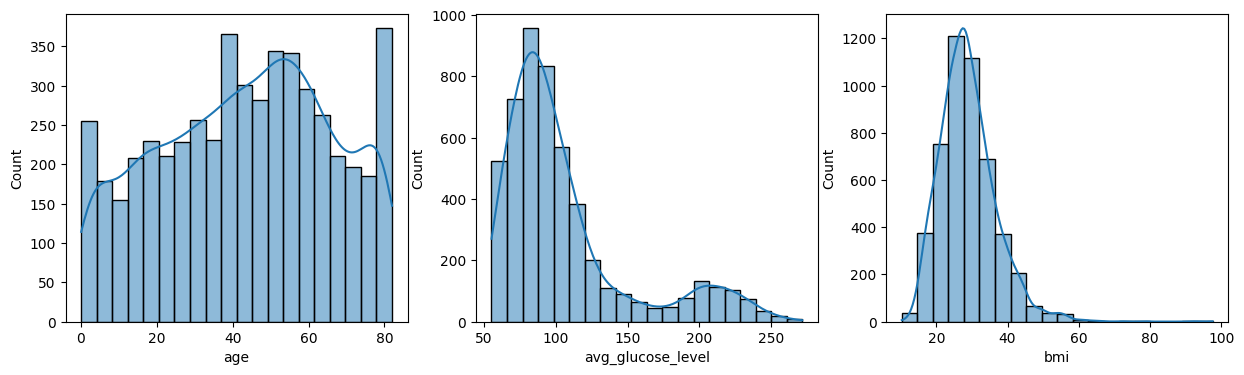

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(data=df, ax=axes[0], x='age', kde=True, bins=20)
sns.histplot(data=df, ax=axes[1], x='avg_glucose_level', kde=True, bins=20)
sns.histplot(data=df, ax=axes[2], x='bmi', kde=True, bins=20)
plt.show()

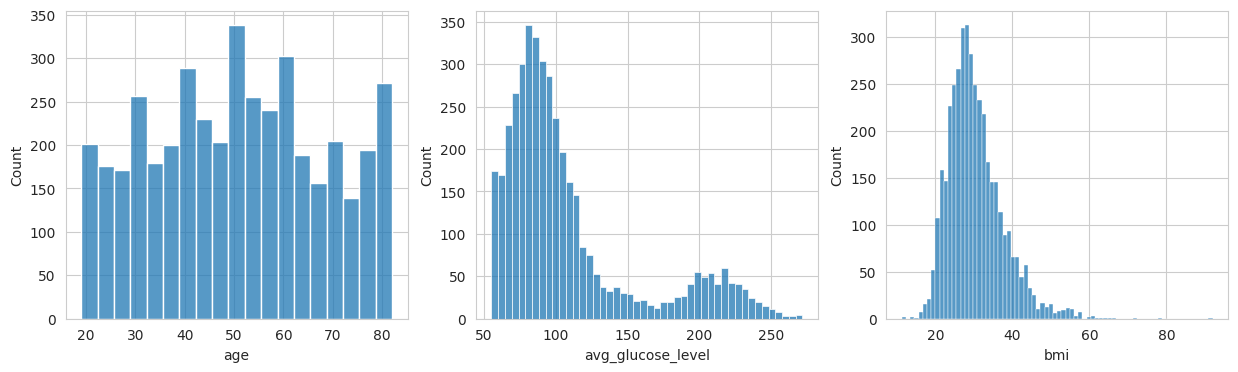

In [47]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(ax=axes[0], x='age', data=df1)
sns.histplot(ax=axes[1], x='avg_glucose_level', data=df1)
sns.histplot(ax=axes[2], x='bmi', data=df1)
plt.show()


In [48]:
Q1 = df1[['age', 'avg_glucose_level', 'bmi']].quantile(0.25)
Q3 = df1[['age', 'avg_glucose_level', 'bmi']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


age                 27.00
avg_glucose_level   38.80
bmi                  8.70
dtype: float64


In [49]:
lower = Q1-3.0*IQR
upper = Q3+3.0*IQR
print(lower)
print(upper)



age                 -44.00
avg_glucose_level   -38.99
bmi                  -0.60
dtype: float64
age                 145.00
avg_glucose_level   232.64
bmi                  60.30
dtype: float64


In [50]:
c1 =df1['avg_glucose_level'] <= 232.64
c2 = df1['avg_glucose_level'] >= 60.3

df2 = df1[c1 & c2]
df2.shape

(3903, 12)

In [51]:
cols = ['age', 'avg_glucose_level', 'bmi']
round(df2[cols].corr(), 2)

,age,avg_glucose_level,bmi
age,1.00,0.21,0.02
avg_glucose_level,0.21,1.00,0.16
bmi,0.02,0.16,1.00


In [52]:
df2.to_csv('stroke_data_clean.csv', index=False)